# Basic multilayer perceptron feedforward neural network for predicting a binary classification of cervical cancer risk factors leading to biopsy

In [165]:
import os
os.chdir('C:\\Users\\Karlp\\Documents\\Data')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
import time
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.model_selection import train_test_split


import keras
from keras.models import Sequential
from keras.layers import Dense

In [58]:
data = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
data.shape

(858, 36)

In [153]:
data_r = data.replace('?', np.nan)
data_r.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [12]:
data_r.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [14]:
data_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null object
First sexual intercourse              851 non-null object
Num of pregnancies                    802 non-null object
Smokes                                845 non-null object
Smokes (years)                        845 non-null object
Smokes (packs/year)                   845 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

### Variables are converted to numeric variables for analysis

In [15]:
data_numeric = data_r.convert_objects(convert_numeric=True)
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [16]:
cols = data.columns
cols

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

### Missing values are replaced with the median value for each column

In [154]:
for i in cols:
    data_numeric[i] = data_numeric[i].fillna(data_numeric[i].median())

data_numeric.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,4.0,3.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0


### All missing values are removed:

In [18]:
data_numeric.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [20]:
df_clean = data_numeric
df_clean.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,4.0,3.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0


### Target and feature set defined

In [130]:
features = cols.tolist()
features.remove('Biopsy')
print(features)

target='Biopsy'

['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology']


### Training and testing sets are defined

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(df_clean[features], df_clean[target], 
                                                    test_size=0.25, random_state=1)
df_clean['Biopsy'].sum()

55

### Normalization is done using a min-max-scalar in order to center data on a 0 and 1 scale

In [132]:
normalization = mms(feature_range = (0,1))
X_train = normalization.fit_transform(X_train)
X_test = normalization.fit_transform(X_test)

X_train[0], X_test[0]


(array([ 0.3943662 ,  0.14285714,  0.45454545,  0.36363636,  0.        ,
         0.        ,  0.        ,  1.        ,  0.26666667,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.14285714,  0.0952381 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([ 0.15625   ,  0.03703704,  0.42105263,  0.2       ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.01315789,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.16666667,  0.11111111,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0

In [133]:
X_train.shape, X_test.shape

((643, 35), (215, 35))

### This function will display a visualization showing the accuracy and loss accross epochs for both the training and validation sets

In [155]:
def show_train_history(train_history, train, val):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[val])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','val'], loc='best')
    plt.show()

In [135]:
neural_network = Sequential()
neural_network.add(Dense(500, input_dim=35, activation = 'relu'))
neural_network.add(Dense(200, activation='relu'))
neural_network.add(Dense(1, activation='sigmoid'))

print(neural_network.summary())

neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

neural_network_fitted = neural_network.fit(X_train, Y_train, validation_split=0.2,  epochs=1000, verbose = 1, batch_size= X_train.shape[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               18000     
_________________________________________________________________
dense_27 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 201       
Total params: 118,401
Trainable params: 118,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 514 samples, validate on 129 samples
Epoch 1/1000
514/514 [==============================] - 0s - loss: 0.7033 - acc: 0.1751 - val_loss: 0.6412 - val_acc: 0.9380
Epoch 2/1000
514/514 [==============================] - 0s - loss: 0.6359 - acc: 0.9397 - val_loss: 0.5884 - val_acc: 0.9380
Epoch 3/1000
514/514 [==============================] - 0s - loss: 0.5773 - acc: 0.9397 - val_loss:

514/514 [==============================] - 0s - loss: 0.0485 - acc: 0.9864 - val_loss: 0.2236 - val_acc: 0.9690
Epoch 124/1000
514/514 [==============================] - 0s - loss: 0.0481 - acc: 0.9864 - val_loss: 0.2248 - val_acc: 0.9690
Epoch 125/1000
514/514 [==============================] - 0s - loss: 0.0477 - acc: 0.9864 - val_loss: 0.2260 - val_acc: 0.9690
Epoch 126/1000
514/514 [==============================] - 0s - loss: 0.0473 - acc: 0.9864 - val_loss: 0.2272 - val_acc: 0.9690
Epoch 127/1000
514/514 [==============================] - 0s - loss: 0.0469 - acc: 0.9864 - val_loss: 0.2285 - val_acc: 0.9690
Epoch 128/1000
514/514 [==============================] - 0s - loss: 0.0465 - acc: 0.9864 - val_loss: 0.2296 - val_acc: 0.9690
Epoch 129/1000
514/514 [==============================] - 0s - loss: 0.0461 - acc: 0.9864 - val_loss: 0.2308 - val_acc: 0.9690
Epoch 130/1000
514/514 [==============================] - 0s - loss: 0.0457 - acc: 0.9864 - val_loss: 0.2319 - val_acc: 0.9690

514/514 [==============================] - 0s - loss: 0.0180 - acc: 0.9942 - val_loss: 0.3234 - val_acc: 0.9612
Epoch 252/1000
514/514 [==============================] - 0s - loss: 0.0179 - acc: 0.9942 - val_loss: 0.3239 - val_acc: 0.9612
Epoch 253/1000
514/514 [==============================] - 0s - loss: 0.0178 - acc: 0.9942 - val_loss: 0.3245 - val_acc: 0.9612
Epoch 254/1000
514/514 [==============================] - 0s - loss: 0.0176 - acc: 0.9942 - val_loss: 0.3251 - val_acc: 0.9612
Epoch 255/1000
514/514 [==============================] - 0s - loss: 0.0175 - acc: 0.9942 - val_loss: 0.3256 - val_acc: 0.9612
Epoch 256/1000
514/514 [==============================] - 0s - loss: 0.0174 - acc: 0.9942 - val_loss: 0.3259 - val_acc: 0.9612
Epoch 257/1000
514/514 [==============================] - 0s - loss: 0.0172 - acc: 0.9942 - val_loss: 0.3263 - val_acc: 0.9612
Epoch 258/1000
514/514 [==============================] - 0s - loss: 0.0171 - acc: 0.9942 - val_loss: 0.3266 - val_acc: 0.9612

514/514 [==============================] - 0s - loss: 0.0091 - acc: 0.9961 - val_loss: 0.3680 - val_acc: 0.9612
Epoch 380/1000
514/514 [==============================] - 0s - loss: 0.0091 - acc: 0.9961 - val_loss: 0.3682 - val_acc: 0.9612
Epoch 381/1000
514/514 [==============================] - 0s - loss: 0.0090 - acc: 0.9961 - val_loss: 0.3683 - val_acc: 0.9612
Epoch 382/1000
514/514 [==============================] - 0s - loss: 0.0090 - acc: 0.9961 - val_loss: 0.3687 - val_acc: 0.9612
Epoch 383/1000
514/514 [==============================] - 0s - loss: 0.0090 - acc: 0.9961 - val_loss: 0.3690 - val_acc: 0.9612
Epoch 384/1000
514/514 [==============================] - 0s - loss: 0.0089 - acc: 0.9961 - val_loss: 0.3694 - val_acc: 0.9612
Epoch 385/1000
514/514 [==============================] - 0s - loss: 0.0089 - acc: 0.9961 - val_loss: 0.3697 - val_acc: 0.9612
Epoch 386/1000
514/514 [==============================] - 0s - loss: 0.0089 - acc: 0.9961 - val_loss: 0.3698 - val_acc: 0.9612

514/514 [==============================] - 0s - loss: 0.0058 - acc: 0.9981 - val_loss: 0.4070 - val_acc: 0.9612
Epoch 508/1000
514/514 [==============================] - 0s - loss: 0.0058 - acc: 0.9981 - val_loss: 0.4074 - val_acc: 0.9612
Epoch 509/1000
514/514 [==============================] - 0s - loss: 0.0057 - acc: 0.9981 - val_loss: 0.4075 - val_acc: 0.9612
Epoch 510/1000
514/514 [==============================] - 0s - loss: 0.0057 - acc: 0.9981 - val_loss: 0.4078 - val_acc: 0.9612
Epoch 511/1000
514/514 [==============================] - 0s - loss: 0.0057 - acc: 0.9981 - val_loss: 0.4082 - val_acc: 0.9612
Epoch 512/1000
514/514 [==============================] - 0s - loss: 0.0057 - acc: 0.9981 - val_loss: 0.4084 - val_acc: 0.9612
Epoch 513/1000
514/514 [==============================] - 0s - loss: 0.0057 - acc: 0.9981 - val_loss: 0.4086 - val_acc: 0.9612
Epoch 514/1000
514/514 [==============================] - 0s - loss: 0.0056 - acc: 0.9981 - val_loss: 0.4089 - val_acc: 0.9612

514/514 [==============================] - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4496 - val_acc: 0.9535
Epoch 636/1000
514/514 [==============================] - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4502 - val_acc: 0.9535
Epoch 637/1000
514/514 [==============================] - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4506 - val_acc: 0.9535
Epoch 638/1000
514/514 [==============================] - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4508 - val_acc: 0.9535
Epoch 639/1000
514/514 [==============================] - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.4512 - val_acc: 0.9535
Epoch 640/1000
514/514 [==============================] - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.4516 - val_acc: 0.9535
Epoch 641/1000
514/514 [==============================] - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.4520 - val_acc: 0.9535
Epoch 642/1000
514/514 [==============================] - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.4524 - val_acc: 0.9535

514/514 [==============================] - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5035 - val_acc: 0.9535
Epoch 764/1000
514/514 [==============================] - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5040 - val_acc: 0.9535
Epoch 765/1000
514/514 [==============================] - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5044 - val_acc: 0.9535
Epoch 766/1000
514/514 [==============================] - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5047 - val_acc: 0.9535
Epoch 767/1000
514/514 [==============================] - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5051 - val_acc: 0.9535
Epoch 768/1000
514/514 [==============================] - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5057 - val_acc: 0.9535
Epoch 769/1000
514/514 [==============================] - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5063 - val_acc: 0.9535
Epoch 770/1000
514/514 [==============================] - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5066 - val_acc: 0.9535

514/514 [==============================] - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5579 - val_acc: 0.9535
Epoch 892/1000
514/514 [==============================] - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5582 - val_acc: 0.9535
Epoch 893/1000
514/514 [==============================] - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5585 - val_acc: 0.9535
Epoch 894/1000
514/514 [==============================] - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5589 - val_acc: 0.9535
Epoch 895/1000
514/514 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5593 - val_acc: 0.9535
Epoch 896/1000
514/514 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5598 - val_acc: 0.9535
Epoch 897/1000
514/514 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5604 - val_acc: 0.9535
Epoch 898/1000
514/514 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5610 - val_acc: 0.9535

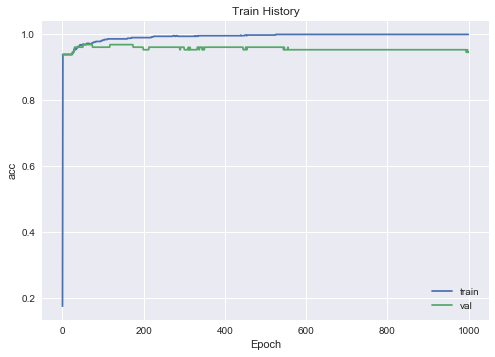

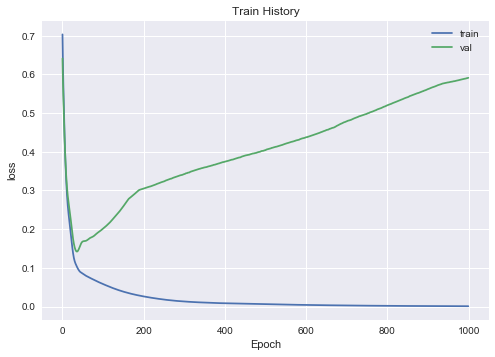

In [156]:
show_train_history(neural_network_fitted,'acc','val_acc')
show_train_history(neural_network_fitted,'loss','val_loss')

In [137]:
neural_network.evaluate(X_test,Y_test, verbose=2)

[0.72923530367917788, 0.94418604762055158]

In [138]:
preds = neural_network.predict_classes(X_test)

 32/215 [===>..........................] - ETA: 0s

In [159]:
predicted = pd.DataFrame({'Biopsy': Y_test})
predicted['predicted']=preds
predicted[predicted['Biopsy']!=predicted['predicted']]

,Biopsy,predicted
34,0,1
370,1,0
434,1,0
482,0,1
797,1,0
345,1,0
185,1,0
385,0,1
23,1,0
687,1,0


In [162]:
predicted['Biopsy'].value_counts()

0    199
1     16
Name: Biopsy, dtype: int64

In [163]:
predicted['predicted'].value_counts()

0    203
1     12
Name: predicted, dtype: int64

# Confusion Matrix
The confusion matrix will help us to determine the accuracy of the model. Due to the fact that target values are highly imbalanced, accuracy is determined based on sensitivity (true postive rate) and speceficity (true negative rate) of the model.

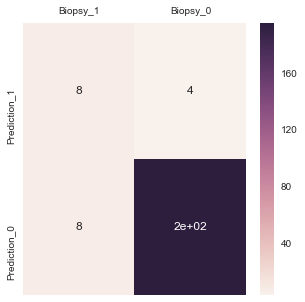

total test case number:  215


In [170]:
cols = ['Biopsy_1','Biopsy_0']  
rows = ['Prediction_1','Prediction_0'] 

TP = len(predicted[(predicted['predicted'] == predicted['Biopsy']) & (predicted['Biopsy'] == 1)])
FN = len(predicted[(predicted['predicted'] != predicted['Biopsy']) & (predicted['Biopsy'] == 1)])
FP = len(predicted[(predicted['predicted'] != predicted['Biopsy']) & (predicted['Biopsy'] == 0)])
TN = len(predicted[(predicted['predicted'] == predicted['Biopsy']) & (predicted['Biopsy'] == 0)])

conf = np.array([[TP,FN],[FP,TN]])
conf_matrix = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf_matrix, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top')
plt.show()

print('total test case number: ', np.sum(conf))

In [171]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('True Positives: ',conf[0][0]) 
    print('False Positives: ',conf[0][1])
    print('False Negatives: ',conf[1][0])
    print('True Negatives: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  215
True Positives:  8
False Positives:  4
False Negatives:  8
True Negatives:  195
##########################
sensitivity:  0.5
specificity:  0.960591133005
false_positive_rate:  0.0201005025126
false_negative_rate:  0.5


(215, 0.5, 0.96059113300492616, 0.020100502512562814, 0.5)

# Model 2: Balancing classes using upsampling
Same model as previously but with upsampling to attenuate the effects of imbalanced classes

In [182]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_clean[features], df_clean[target], 
                                                    test_size=0.25, random_state=1)

In [183]:
train, test = train_test_split(df_clean, test_size=0.25, random_state=1)

train.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
473,41,3.0,20.0,4.0,0.0,0.0,0.00,1.0,8.00,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
0,18,4.0,15.0,1.0,0.0,0.0,0.00,0.0,0.00,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
798,25,4.0,17.0,2.0,0.0,0.0,0.00,0.0,0.00,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
247,23,1.0,19.0,2.0,0.0,0.0,0.00,1.0,0.67,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
74,35,2.0,17.0,2.0,1.0,15.0,0.32,1.0,0.50,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0


In [184]:
from sklearn.utils import resample

In [185]:
train_majority = train[train['Biopsy'] == 0]
train_minority = train[train['Biopsy'] == 1]

train_majority.shape

(604, 36)

In [188]:
train_minority_upsampled = resample(train_minority,
                                       replace=True,
                                       n_samples=604,
                                       random_state=1)
train_minority_upsampled.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
264,22,2.0,15.0,2.0,1.0,5.0,1.25,1.0,6.0,0.0,...,4.0,3.0,0,0,0,0,0,1,0,1
335,29,2.0,18.0,4.0,0.0,0.0,0.00,0.0,0.0,0.0,...,4.0,3.0,1,0,1,1,0,1,1,1
530,21,4.0,15.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,1,1,1
496,27,1.0,18.0,3.0,0.0,0.0,0.00,1.0,0.5,0.0,...,4.0,3.0,0,0,0,0,1,1,0,1
670,47,2.0,17.0,3.0,0.0,0.0,0.00,1.0,20.0,0.0,...,4.0,3.0,0,0,0,0,0,1,1,1


In [189]:
train_upsampled=pd.concat([train_majority,train_minority_upsampled])
train_upsampled['Biopsy'].value_counts()

1    604
0    604
Name: Biopsy, dtype: int64

### We must now split the upsampled training set further

In [190]:
train_up_shuffled = train_upsampled.sample(frac=1)
Y_train_up = train_up_shuffled[target]
X_train_up = train_up_shuffled[features]

X_train_up.shape

(1208, 35)

In [191]:
nn_upsampled = Sequential()
nn_upsampled.add(Dense(500, input_dim=35, activation = 'relu'))
nn_upsampled.add(Dense(200, activation='relu'))
nn_upsampled.add(Dense(1, activation='sigmoid'))

print(nn_upsampled.summary())

nn_upsampled.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nn_upsampled_fitted = nn_upsampled.fit(np.array(X_train_up), np.array(Y_train_up), validation_split=0.2,  epochs=1000, verbose = 1, batch_size= X_train_up.shape[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 500)               18000     
_________________________________________________________________
dense_33 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 201       
Total params: 118,401
Trainable params: 118,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 966 samples, validate on 242 samples
Epoch 1/1000
966/966 [==============================] - 0s - loss: 0.7723 - acc: 0.4441 - val_loss: 0.9171 - val_acc: 0.4711
Epoch 2/1000
966/966 [==============================] - 0s - loss: 0.8268 - acc: 0.5072 - val_loss: 0.7725 - val_acc: 0.5537
Epoch 3/1000
966/966 [==============================] - 0s - loss: 0.8158 - acc: 0.5114 - val_loss:

966/966 [==============================] - 0s - loss: 0.0878 - acc: 0.9700 - val_loss: 0.1234 - val_acc: 0.9711
Epoch 124/1000
966/966 [==============================] - 0s - loss: 0.0866 - acc: 0.9700 - val_loss: 0.1205 - val_acc: 0.9752
Epoch 125/1000
966/966 [==============================] - 0s - loss: 0.0855 - acc: 0.9700 - val_loss: 0.1186 - val_acc: 0.9752
Epoch 126/1000
966/966 [==============================] - 0s - loss: 0.0848 - acc: 0.9700 - val_loss: 0.1198 - val_acc: 0.9752
Epoch 127/1000
966/966 [==============================] - 0s - loss: 0.0839 - acc: 0.9700 - val_loss: 0.1200 - val_acc: 0.9711
Epoch 128/1000
966/966 [==============================] - 0s - loss: 0.0831 - acc: 0.9700 - val_loss: 0.1169 - val_acc: 0.9752
Epoch 129/1000
966/966 [==============================] - 0s - loss: 0.0822 - acc: 0.9700 - val_loss: 0.1166 - val_acc: 0.9752
Epoch 130/1000
966/966 [==============================] - 0s - loss: 0.0816 - acc: 0.9700 - val_loss: 0.1192 - val_acc: 0.9711

966/966 [==============================] - 0s - loss: 0.0298 - acc: 0.9969 - val_loss: 0.0931 - val_acc: 0.9835
Epoch 252/1000
966/966 [==============================] - 0s - loss: 0.0297 - acc: 0.9969 - val_loss: 0.0923 - val_acc: 0.9835
Epoch 253/1000
966/966 [==============================] - 0s - loss: 0.0296 - acc: 0.9969 - val_loss: 0.0915 - val_acc: 0.9835
Epoch 254/1000
966/966 [==============================] - 0s - loss: 0.0293 - acc: 0.9969 - val_loss: 0.0930 - val_acc: 0.9835
Epoch 255/1000
966/966 [==============================] - 0s - loss: 0.0292 - acc: 0.9969 - val_loss: 0.0938 - val_acc: 0.9835
Epoch 256/1000
966/966 [==============================] - 0s - loss: 0.0289 - acc: 0.9969 - val_loss: 0.0932 - val_acc: 0.9835
Epoch 257/1000
966/966 [==============================] - 0s - loss: 0.0290 - acc: 0.9969 - val_loss: 0.0948 - val_acc: 0.9835
Epoch 258/1000
966/966 [==============================] - 0s - loss: 0.0287 - acc: 0.9969 - val_loss: 0.0937 - val_acc: 0.9835

966/966 [==============================] - 0s - loss: 0.0146 - acc: 0.9969 - val_loss: 0.0890 - val_acc: 0.9835
Epoch 380/1000
966/966 [==============================] - 0s - loss: 0.0145 - acc: 0.9969 - val_loss: 0.0900 - val_acc: 0.9835
Epoch 381/1000
966/966 [==============================] - 0s - loss: 0.0144 - acc: 0.9969 - val_loss: 0.0895 - val_acc: 0.9835
Epoch 382/1000
966/966 [==============================] - 0s - loss: 0.0144 - acc: 0.9969 - val_loss: 0.0898 - val_acc: 0.9835
Epoch 383/1000
966/966 [==============================] - 0s - loss: 0.0143 - acc: 0.9969 - val_loss: 0.0902 - val_acc: 0.9835
Epoch 384/1000
966/966 [==============================] - 0s - loss: 0.0141 - acc: 0.9969 - val_loss: 0.0898 - val_acc: 0.9835
Epoch 385/1000
966/966 [==============================] - 0s - loss: 0.0140 - acc: 0.9969 - val_loss: 0.0903 - val_acc: 0.9835
Epoch 386/1000
966/966 [==============================] - 0s - loss: 0.0140 - acc: 0.9969 - val_loss: 0.0916 - val_acc: 0.9835

966/966 [==============================] - 0s - loss: 0.0056 - acc: 0.9990 - val_loss: 0.1092 - val_acc: 0.9876
Epoch 508/1000
966/966 [==============================] - 0s - loss: 0.0055 - acc: 0.9990 - val_loss: 0.1089 - val_acc: 0.9876
Epoch 509/1000
966/966 [==============================] - 0s - loss: 0.0055 - acc: 0.9990 - val_loss: 0.1103 - val_acc: 0.9876
Epoch 510/1000
966/966 [==============================] - 0s - loss: 0.0054 - acc: 0.9990 - val_loss: 0.1109 - val_acc: 0.9876
Epoch 511/1000
966/966 [==============================] - 0s - loss: 0.0054 - acc: 0.9990 - val_loss: 0.1091 - val_acc: 0.9876
Epoch 512/1000
966/966 [==============================] - 0s - loss: 0.0053 - acc: 0.9990 - val_loss: 0.1109 - val_acc: 0.9876
Epoch 513/1000
966/966 [==============================] - 0s - loss: 0.0053 - acc: 0.9990 - val_loss: 0.1114 - val_acc: 0.9876
Epoch 514/1000
966/966 [==============================] - 0s - loss: 0.0052 - acc: 0.9990 - val_loss: 0.1112 - val_acc: 0.9876

966/966 [==============================] - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.1399 - val_acc: 0.9793
Epoch 636/1000
966/966 [==============================] - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.1397 - val_acc: 0.9793
Epoch 637/1000
966/966 [==============================] - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.1399 - val_acc: 0.9793
Epoch 638/1000
966/966 [==============================] - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1402 - val_acc: 0.9793
Epoch 639/1000
966/966 [==============================] - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1410 - val_acc: 0.9793
Epoch 640/1000
966/966 [==============================] - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1409 - val_acc: 0.9793
Epoch 641/1000
966/966 [==============================] - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1410 - val_acc: 0.9793
Epoch 642/1000
966/966 [==============================] - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1416 - val_acc: 0.9793

966/966 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1640 - val_acc: 0.9793
Epoch 764/1000
966/966 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1640 - val_acc: 0.9793
Epoch 765/1000
966/966 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1639 - val_acc: 0.9793
Epoch 766/1000
966/966 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1639 - val_acc: 0.9793
Epoch 767/1000
966/966 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1639 - val_acc: 0.9793
Epoch 768/1000
966/966 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1642 - val_acc: 0.9793
Epoch 769/1000
966/966 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1641 - val_acc: 0.9793
Epoch 770/1000
966/966 [==============================] - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1636 - val_acc: 0.9793

966/966 [==============================] - 0s - loss: 7.2475e-04 - acc: 1.0000 - val_loss: 0.1657 - val_acc: 0.9793
Epoch 889/1000
966/966 [==============================] - 0s - loss: 7.1768e-04 - acc: 1.0000 - val_loss: 0.1662 - val_acc: 0.9793
Epoch 890/1000
966/966 [==============================] - 0s - loss: 7.1456e-04 - acc: 1.0000 - val_loss: 0.1671 - val_acc: 0.9793
Epoch 891/1000
966/966 [==============================] - 0s - loss: 7.1529e-04 - acc: 1.0000 - val_loss: 0.1676 - val_acc: 0.9793
Epoch 892/1000
966/966 [==============================] - 0s - loss: 7.1274e-04 - acc: 1.0000 - val_loss: 0.1682 - val_acc: 0.9793
Epoch 893/1000
966/966 [==============================] - 0s - loss: 7.1437e-04 - acc: 1.0000 - val_loss: 0.1686 - val_acc: 0.9793
Epoch 894/1000
966/966 [==============================] - 0s - loss: 7.1392e-04 - acc: 1.0000 - val_loss: 0.1684 - val_acc: 0.9793
Epoch 895/1000
966/966 [==============================] - 0s - loss: 7.0997e-04 - acc: 1.0000 - va

In [192]:
nn_upsampled.evaluate(np.array(X_test2),np.array(Y_test2), verbose=2)

[0.45430508257664176, 0.95348837209302328]

In [193]:
preds2 = nn_upsampled.predict_classes(np.array(X_test2))

 32/215 [===>..........................] - ETA: 0s

### Training a neural network with upsampled data yielded slightly more accurate results

In [196]:
predicted2 = pd.DataFrame({'Biopsy': Y_test2})
predicted2['predicted']=preds2
predicted2[predicted2['Biopsy']!=predicted2['predicted']]


,Biopsy,predicted
434,1,0
482,0,1
797,1,0
345,1,0
185,1,0
385,0,1
121,0,1
687,1,0
57,0,1
719,0,1


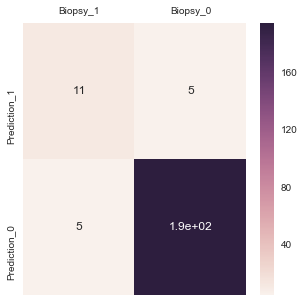

total test case number:  215


In [198]:
cols = ['Biopsy_1','Biopsy_0']  
rows = ['Prediction_1','Prediction_0'] 

TP2 = len(predicted2[(predicted2['predicted'] == predicted2['Biopsy']) & (predicted2['Biopsy'] == 1)])
FN2 = len(predicted2[(predicted2['predicted'] != predicted2['Biopsy']) & (predicted2['Biopsy'] == 1)])
FP2 = len(predicted2[(predicted2['predicted'] != predicted2['Biopsy']) & (predicted2['Biopsy'] == 0)])
TN2 = len(predicted2[(predicted2['predicted'] == predicted2['Biopsy']) & (predicted2['Biopsy'] == 0)])

conf2 = np.array([[TP2,FN2],[FP2,TN2]])
conf_matrix2 = pd.DataFrame(conf2, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf_matrix2, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top')
plt.show()

print('total test case number: ', np.sum(conf2))

In [199]:
model_efficacy(conf2)

total_num:  215
True Positives:  11
False Positives:  5
False Negatives:  5
True Negatives:  194
##########################
sensitivity:  0.6875
specificity:  0.974874371859
false_positive_rate:  0.0251256281407
false_negative_rate:  0.3125


(215, 0.6875, 0.97487437185929648, 0.025125628140703519, 0.3125)